Cargando datos...
Reduciendo dimensionalidad...
Ejecutando K-Means...
Mapeando etiquetas...
Precisión del modelo: 53.22%
Visualizando resultados...


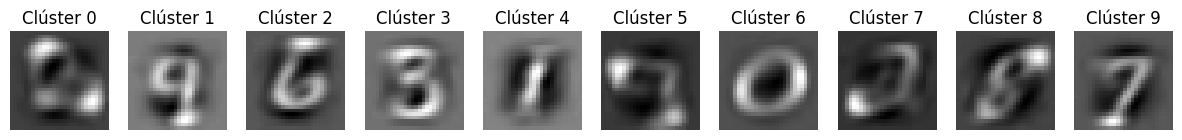

In [1]:
# Cargar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Cargar el conjunto de datos MNIST
print("Cargando datos...")
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target
y = y.astype(int)  # Convertir etiquetas a enteros

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir dimensionalidad con PCA para visualizar y mejorar desempeño
print("Reduciendo dimensionalidad...")
pca = PCA(n_components=50)  # Reducción a 50 componentes principales
X_pca = pca.fit_transform(X_scaled)

# 2. Implementar el algoritmo K-Means
print("Ejecutando K-Means...")
kmeans = KMeans(n_clusters=10, random_state=42)  # 10 grupos para los dígitos
kmeans.fit(X_pca)

# 3. Asociar etiquetas de los clústeres a los dígitos
print("Mapeando etiquetas...")
cluster_labels = np.zeros_like(kmeans.labels_)

for i in range(10):  # Iterar sobre cada clúster
    mask = kmeans.labels_ == i
    cluster_labels[i] = np.bincount(y[mask]).argmax()

# Calcular precisión
accuracy = accuracy_score(y, cluster_labels[kmeans.labels_])
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# 4. Visualizar algunos dígitos con sus clústeres
print("Visualizando resultados...")
fig, ax = plt.subplots(1, 10, figsize=(15, 4))
centroids = kmeans.cluster_centers_

for i in range(10):
    ax[i].imshow(pca.inverse_transform(centroids[i]).reshape(28, 28), cmap="gray")
    ax[i].axis("off")
    ax[i].set_title(f"Clúster {i}")

plt.show()
